In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


Reading Dataset

In [55]:
raw_file = '/content/laptop_prices.csv'
df = pd.read_csv(raw_file)

Display the dataset

In [56]:
print (df.head(5))

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

Identifying the top 5 laptop by the number of products

In [57]:
top_5_brands = df['Company'].value_counts().head(5)
print("Top 5 laptopp by the number of product company: ",top_5_brands)

Top 5 laptopp by the number of product company:  Company
Dell      291
Lenovo    289
HP        268
Asus      152
Acer      101
Name: count, dtype: int64


Finding Average Price

In [58]:
avg_price = df.groupby('Company')['Price_euros'].mean()
print("Avg price: ",avg_price)

Avg price:  Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64


Finding the highest average




In [59]:
high_avg_price = avg_price.nlargest(5)
print ("High avg price",high_avg_price)


High avg price Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Name: Price_euros, dtype: float64


Finding the lowest average

In [60]:
low_avg_price = avg_price.nsmallest(5)
print ("Low avg price",low_avg_price)

Low avg price Company
Vero        217.425000
Mediacom    295.000000
Chuwi       314.296667
Acer        633.464455
Fujitsu     729.000000
Name: Price_euros, dtype: float64


Correlation between Price_euros and others.

In [61]:
features = ['Price_euros', 'CPU_freq', 'Ram','Inches', 'Weight']
correlation_matrix = df[features].corr()
print("Correlation Matrix",correlation_matrix)

Correlation Matrix              Price_euros  CPU_freq       Ram    Inches    Weight
Price_euros     1.000000  0.428847  0.740287  0.070091  0.211883
CPU_freq        0.428847  1.000000  0.366254  0.303115  0.318649
Ram             0.740287  0.366254  1.000000  0.245009  0.389370
Inches          0.070091  0.303115  0.245009  1.000000  0.827339
Weight          0.211883  0.318649  0.389370  0.827339  1.000000


Ploting correlation heatmap

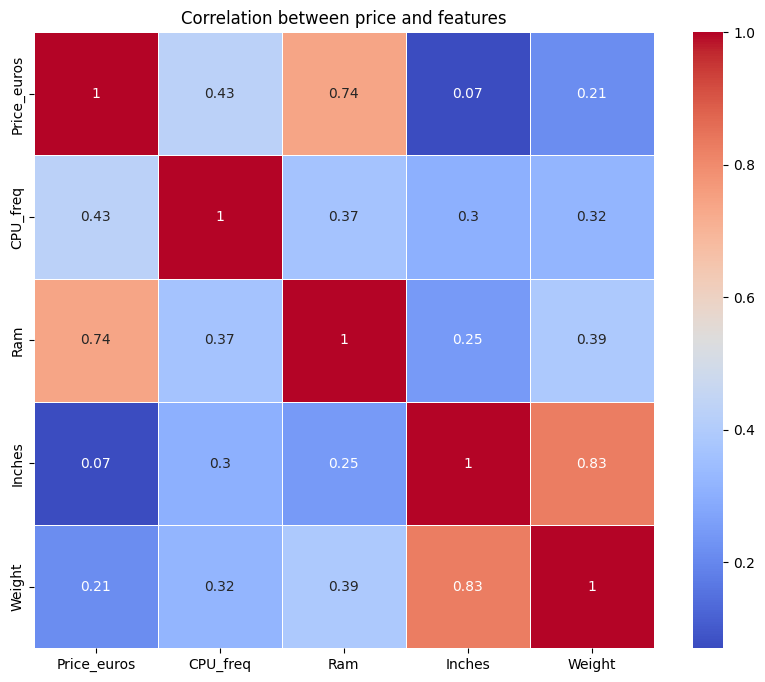

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between price and features')
plt.show()

creating new feature, StorageTotal

In [63]:
df['StorageTotal'] = df['PrimaryStorage'] + df['SecondaryStorage']
print("New added StorageTotal: ",df[['PrimaryStorage', 'SecondaryStorage','StorageTotal']])

New added StorageTotal:        PrimaryStorage  SecondaryStorage  StorageTotal
0                128                 0           128
1                128                 0           128
2                256                 0           256
3                512                 0           512
4                256                 0           256
...              ...               ...           ...
1270             128                 0           128
1271             512                 0           512
1272              64                 0            64
1273            1024                 0          1024
1274             500                 0           500

[1275 rows x 3 columns]


Building a regression model to predict Price_euros

In [64]:
X = df[['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage', 'GPU_company']]
X = pd.get_dummies(X, drop_first=True)
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this below portion(imputer) I can't run the model it's continuously showing error,showing(value error beacuse of GPU_company but I don't get it) so I took a little help from AI and fix the error by using imputer from sklearn.


In [65]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

Training the model and predict the prices

In [66]:
re_model = LinearRegression()
re_model.fit(X_train, y_train)
y_pred = re_model.predict(X_test)

finding mean squared error and r2 for evaluating

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 164518.27669825123
R-squared: 0.6685366541378428


Building Classifiaction model

In [68]:
X_cls = df[['Inches', 'Ram', 'PrimaryStorage','Weight']]
y_cls = df['TypeName']

Encode the target variable

In [69]:
le = LabelEncoder()
y_cls_encoded = le.fit_transform(y_cls)

Spliting the data to traing and testing

In [70]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls_encoded, test_size=0.2, random_state=42)

Train a random forest classifier

In [71]:
clf= RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls,y_train_cls)

RandomForestClassifier(random_state=42)

Predict the laptop types

In [72]:
y_pred_cls = clf.predict(X_test_cls)

Evaluating the model

In [73]:
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.29      0.36        28
           1       0.67      0.79      0.72        43
           2       0.50      0.25      0.33         4
           3       0.84      0.80      0.82       139
           4       0.58      0.79      0.67        33
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2

    accuracy                           0.71       255
   macro avg       0.44      0.42      0.41       255
weighted avg       0.71      0.71      0.70       255

Confusion Matrix:
 [[  8   1   0   8  10   1   0]
 [  0  34   0   5   0   4   0]
 [  1   0   1   1   1   0   0]
 [  6  12   0 111   7   3   0]
 [  2   0   1   4  26   0   0]
 [  0   3   0   3   0   0   0]
 [  0   1   0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature importance for calssification

In [74]:
feature_importances = pd.Series(clf.feature_importances_, index=X_cls.columns)
feature_importances = feature_importances.sort_values(ascending=False)

Ploting feature importance

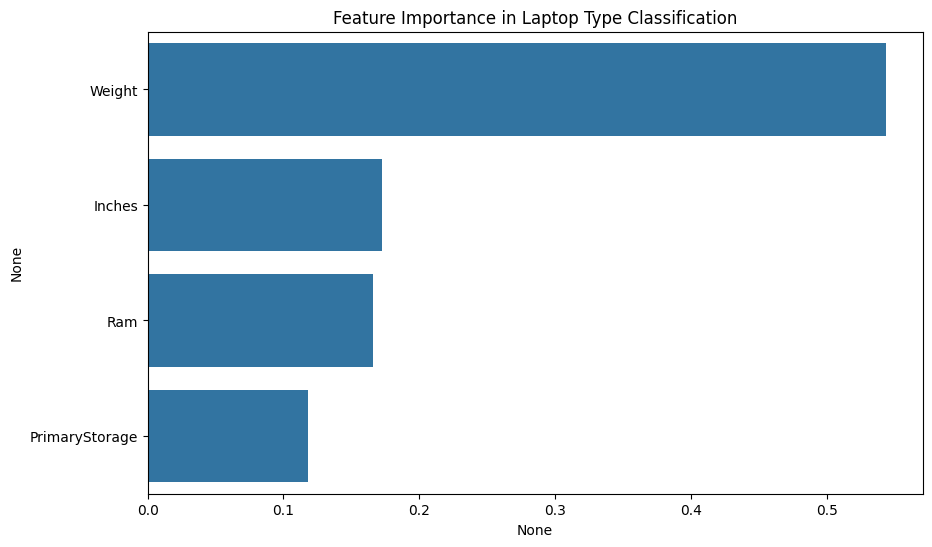

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance in Laptop Type Classification')
plt.show()